In [15]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [94]:
pip install google-colab

  Using cached google_colab-1.0.0-py2.py3-none-any.whl
  Using cached google_auth-1.4.2-py2.py3-none-any.whl (64 kB)
  Using cached ipykernel-4.6.1-py3-none-any.whl (104 kB)
  Using cached ipython-5.5.0-py3-none-any.whl (758 kB)
  Using cached notebook-5.2.2-py2.py3-none-any.whl (8.0 MB)
  Using cached six-1.12.0-py2.py3-none-any.whl (10 kB)
  Using cached pandas-0.24.2.tar.gz (11.8 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): still running...
  Preparing metadata (setup.py): still running...
  Preparing metadata (setup.py): finished with status 'done'
  Using cached portpicker-1.2.0-py3-none-any.whl
  Using cached requests-2.21.0-py2.py3-none-any.whl (57 kB)
  Using cached tornado-4.5.3-cp39-cp39-win_amd64.whl
  Using cached prompt_toolkit-1.0.18-py3-none-any.whl (245 kB)
  Using cached simplegeneric-0.8.1-py3-none-any.whl
  Using cached chardet-3.0.4-py2.py3-none-any.whl (133 kB)
  Using cached idna-2.8-py2.py3-none-any.whl (58 kB)
  Using cached urll

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [1139 lines of output]
  C:\Users\procns\AppData\Local\Temp\pip-install-ve3oknvo\pandas_83164d5bd5c549b9ad9bfc75d38e0f3b\setup.py:50: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
    _CYTHON_INSTALLED = ver >= LooseVersion(min_cython_ver)
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\pandas
  copying pandas\conftest.py -> build\lib.win-amd64-cpython-39\pandas
  copying pandas\testing.py -> build\lib.win-amd64-cpython-39\pandas
  copying pandas\_version.py -> build\lib.win-amd64-cpython-39\pandas
  copying pandas\__init__.py -> build\lib.win-amd64-cpython-39\pandas
  creating build\lib.win-amd64-cpython-39\pandas\api
  copying pandas\api\__init__.py -> build\lib.win-amd64-cpython-39\pandas\api
  creating build\lib.

ModuleNotFoundError: No module named 'google.colab'

In [16]:
# 데이터 종류 확인
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [17]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height','Width']].to_numpy()

In [18]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [19]:
fish_target= fish['Species'].to_numpy()

In [20]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state = 42)

In [21]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [48]:
#K-최근접 이웃 분류기의 확률 예측 -> 과소적합
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


n_neighbors : 1
1.0
0.85
n_neighbors : 2
0.8907563025210085
0.825
n_neighbors : 3
0.8907563025210085
0.85
n_neighbors : 4
0.8235294117647058
0.825
n_neighbors : 5
0.7983193277310925
0.85
n_neighbors : 6
0.8235294117647058
0.85
n_neighbors : 7
0.8319327731092437
0.85
n_neighbors : 8
0.8067226890756303
0.825
n_neighbors : 9
0.7983193277310925
0.825


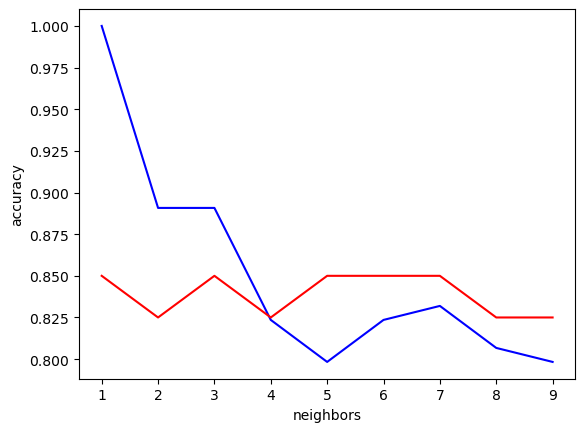

In [62]:
import matplotlib.pyplot as plt
train_acc = []
test_acc = []
for i in range(1,10):
    kn = KNeighborsClassifier(n_neighbors = i)
    kn.fit(train_scaled, train_target)
    print('n_neighbors : '+ str(i))
    train_acc.append(kn.score(train_scaled, train_target))
    test_acc.append(kn.score(test_scaled, test_target))
    print(kn.score(train_scaled, train_target))
    print(kn.score(test_scaled, test_target))

i = [1,2,3,4,5,6,7,8,9]
plt.plot(i, train_acc, 'b')
plt.plot(i, test_acc, 'r') 
#plt.title('n_neighbors = {}'.format(n))
plt.xlabel('neighbors')
plt.ylabel('accuracy')
plt.show()

### 분류 문제에서 score는 정확도이며, 회귀 문제에는 결정계수이다.

In [23]:
print(kn.classes_)
print(kn.predict(test_scaled[:5]))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


## 클래스 확률을 알아보자

In [34]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 4)) # 소수점 4자리까지 표시
print('---------------------------')
# 최근접 이웃으로 4번째 값 예측 가장 가까운 거리와 index를 추출
#distance, indexes = kn.kneighbors(test_scaled[3:4])
distance, indexes = kn.kneighbors(test_scaled[[4]])
print(train_target[indexes])

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]
---------------------------
[['Perch' 'Perch' 'Roach']]


### 3개의 최근접 이웃을 사용하여 가능성이 1/3, 2/3, 3/3밖에 없으므로 다양성이 없다

#### n_neighbors 파라미터 값을 증가시키면 확률의 다양성이 약간 증가한다. 

# 로지스틱 회귀

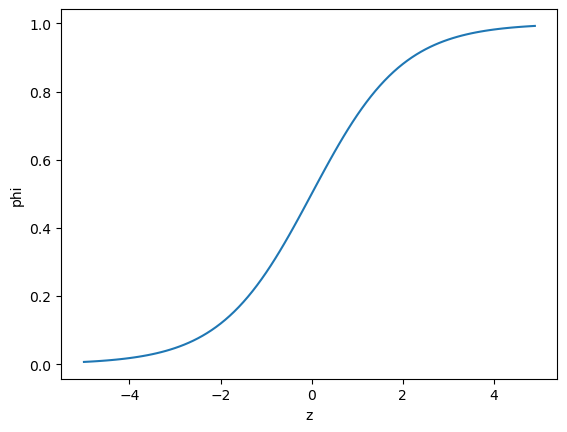

In [63]:
#로지스틱 회귀
# 선형 방적싱을 학습( 분류 모델 )->시그모이드(로지스틱 함수 사용)
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z)) # 
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()
# 이진 분류에서는 0,5보다 크면 양성, 0.5보다 작으면 음성 클래스로 판단.

In [ ]:
# 불리언 인덱싱


In [64]:
# 훈련 세트에서 도미와 빙어의 행만 골라내기
bream_smelt_indexes = (train_target == 'Bream') | (train_target =='Smelt')
print(bream_smelt_indexes)

train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

[ True False  True False False False False  True False False False  True
 False False False  True  True False False  True False  True False False
 False  True False False  True False False False False  True False False
  True  True False False False False False  True False False False False
 False  True False  True False False  True False False False  True False
 False False False False False  True False  True False False False False
 False False False False False  True False  True False False  True  True
 False False False  True False False False False False  True False False
 False  True False  True False False  True  True False False False False
 False False False False  True  True False False  True False False]


In [65]:
print(pd.unique(target_bream_smelt))

['Bream' 'Smelt']


In [66]:
#로지스틱 회귀 사용
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [67]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [70]:
# 클래스 음성/양성
print(lr.classes_) # 사이킷런은 알파벳 순으로 클래스 정렬
# 예측 확률 출력
print(lr.predict_proba(train_bream_smelt[:5]))

['Bream' 'Smelt']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [69]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


### coef(계수), intercept(절편)

In [71]:
#LogisticRegression 모델로 양성 클래스에 대한 z값 계산
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [72]:
#시그모이드 함수에 통과시키면 양성 클래스에 대한 확률이 나타난다.
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


# 로지스틱 회귀 다중분류

### 반복적인 알고리즘 사용
### 기본값은 max_iter = 100으로서 불충분하기 때문에 1000으로 상향조정함
### 릿지 규제 방식(L2 규제)와 같이 계수의 제곱을 규제함
### 규제를 느슨하게 하기 위해 c = 20으로 상향조정함

In [73]:
#로지스틱 회귀로 다중 분류 수행하기
#LogisticRegression 클래스는 반복적인 알고리즘 -.  max_iter 매개변수에서 반복 횟수 지정
#LogisticRegression 클래스는 기본적으로 릿지 회귀와 같이 계수의 제곱을 규제(L2규제)
#규제를 제어하는 매개변수 C. 적을수록 규제가 커짐
lr = LogisticRegression(C = 20, max_iter = 1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
print(lr.predict(test_scaled[:5]))
print(lr.classes_)
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 3))

0.9327731092436975
0.925
['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [79]:
# class 개수가 7개, 특성이 5개 이므로 각각의 class에 대한 계수가 주어진다
print(lr.coef_,'\n',lr.intercept_)
print('-----------------------------------')
print(lr.coef_.shape, lr.intercept_.shape)

[[-1.48986217 -1.02993738  2.59442523  7.70317852 -1.20029196]
 [ 0.19634317 -2.00935252 -3.78045585  6.50474233 -1.99514592]
 [ 3.56250912  6.34406973 -8.4900971  -5.75745418  3.79323748]
 [-0.1050809   3.60284123  3.93066839 -3.61707744 -1.75102734]
 [-1.40030385 -6.07531395  5.25937344 -0.87220402  1.86069287]
 [-1.38523809  1.49231584  1.39234448 -5.67720457 -4.4010109 ]
 [ 0.62163272 -2.32462296 -0.90625859  1.71601937  3.69354577]] 
 [-0.09220027 -0.26297954  3.25070805 -0.14650445  2.65466181 -6.78781452
  1.38412892]
-----------------------------------
(7, 5) (7,)


In [81]:
#다중 분류는 클래스마다 z값을 계산한다. (클래스마다 선형 함수가 있음)
# 소프트맥스 함수를 사용하여 7개의 z값을 확률로 변환
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals = 2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [82]:
from scipy.special import softmax
proba = softmax(decision, axis = 1) # axis를 1로 하여 행으로 계산
print(np.round(proba, decimals = 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [93]:
train_score = []
test_score = []
best_test_score = 0
best_train_score = 0
best_c = 0
best_maxiter = 0
for c in range(1,21):
    for maxiter in (100, 1100, 100):
        lr = LogisticRegression(C = c, max_iter = maxiter)
        lr.fit(train_scaled, train_target)
        #train_score.append(lr.score(train_scaled, train_target))
        #test_score.append(lr.score(test_scaled, test_target))
        if(lr.score(test_scaled, test_target) >= best_test_score and
           lr.score(train_scaled, train_target) >= best_train_score):
            best_train_score = lr.score(train_scaled, train_target)
            best_test_score = lr.score(test_scaled, test_target)
            best_c = c
            best_maxiter = maxiter
        print('c : ' + str(c) + ','+ ' max_iter :  ' + str(maxiter))
        print('train_score = '+ str(lr.score(train_scaled, train_target)))
        print('test_score = ' + str(lr.score(test_scaled, test_target)))
        
print('best_train_score : ' + str(best_train_score))
print('best_test_score : ' + str(best_test_score))
print('best_c : ' + str(best_c))
print('best_maxiter : ' + str(best_maxiter))

c : 1, max_iter :  100
train_score = 0.8067226890756303
test_score = 0.85
c : 1, max_iter :  1100
train_score = 0.8067226890756303
test_score = 0.85
c : 1, max_iter :  100
train_score = 0.8067226890756303
test_score = 0.85
c : 2, max_iter :  100
train_score = 0.8319327731092437
test_score = 0.85
c : 2, max_iter :  1100
train_score = 0.8319327731092437
test_score = 0.85
c : 2, max_iter :  100
train_score = 0.8319327731092437
test_score = 0.85
c : 3, max_iter :  100
train_score = 0.8403361344537815
test_score = 0.85
c : 3, max_iter :  1100
train_score = 0.8403361344537815
test_score = 0.85
c : 3, max_iter :  100
train_score = 0.8403361344537815
test_score = 0.85
c : 4, max_iter :  100
train_score = 0.8403361344537815
test_score = 0.9
c : 4, max_iter :  1100
train_score = 0.8403361344537815
test_score = 0.9
c : 4, max_iter :  100
train_score = 0.8403361344537815
test_score = 0.9
c : 5, max_iter :  100
train_score = 0.8823529411764706
test_score = 0.925
c : 5, max_iter :  1100
train_score 

C:\Users\procns\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\procns\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

train_score = 0.9159663865546218
test_score = 0.925
c : 12, max_iter :  100
train_score = 0.9159663865546218
test_score = 0.925
c : 12, max_iter :  1100
train_score = 0.9159663865546218
test_score = 0.925
c : 12, max_iter :  100
train_score = 0.9159663865546218
test_score = 0.925
c : 13, max_iter :  100
train_score = 0.9159663865546218
test_score = 0.925
c : 13, max_iter :  1100
train_score = 0.9159663865546218
test_score = 0.925


C:\Users\procns\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\procns\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

c : 13, max_iter :  100
train_score = 0.9159663865546218
test_score = 0.925
c : 14, max_iter :  100
train_score = 0.9159663865546218
test_score = 0.925
c : 14, max_iter :  1100
train_score = 0.9159663865546218
test_score = 0.925
c : 14, max_iter :  100
train_score = 0.9159663865546218
test_score = 0.925
c : 15, max_iter :  100
train_score = 0.9243697478991597
test_score = 0.925


C:\Users\procns\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\procns\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

c : 15, max_iter :  1100
train_score = 0.9243697478991597
test_score = 0.925
c : 15, max_iter :  100
train_score = 0.9243697478991597
test_score = 0.925
c : 16, max_iter :  100
train_score = 0.9243697478991597
test_score = 0.925
c : 16, max_iter :  1100
train_score = 0.9243697478991597
test_score = 0.925


C:\Users\procns\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\procns\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

c : 16, max_iter :  100
train_score = 0.9243697478991597
test_score = 0.925
c : 17, max_iter :  100
train_score = 0.9243697478991597
test_score = 0.925
c : 17, max_iter :  1100
train_score = 0.9243697478991597
test_score = 0.925
c : 17, max_iter :  100
train_score = 0.9243697478991597
test_score = 0.925
c : 18, max_iter :  100
train_score = 0.9243697478991597
test_score = 0.925
c : 18, max_iter :  1100
train_score = 0.9243697478991597
test_score = 0.925


C:\Users\procns\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\procns\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

c : 18, max_iter :  100
train_score = 0.9243697478991597
test_score = 0.925
c : 19, max_iter :  100
train_score = 0.9243697478991597
test_score = 0.925
c : 19, max_iter :  1100
train_score = 0.9243697478991597
test_score = 0.925
c : 19, max_iter :  100
train_score = 0.9243697478991597
test_score = 0.925
c : 20, max_iter :  100
train_score = 0.9327731092436975
test_score = 0.925
c : 20, max_iter :  1100
train_score = 0.9327731092436975
test_score = 0.925
c : 20, max_iter :  100
train_score = 0.9327731092436975
test_score = 0.925
best_train_score : 0.9327731092436975
best_test_score : 0.925
best_c : 20
best_maxiter : 100


C:\Users\procns\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
